# Divergence of a Fixed Root Flexible Wing

***

In this notebook we'll consider a more realistic example of static aeroelastic behavior, looking at the divergence of a flexible wing fixed at the root.

Let's examine the rectangular wing below having semi-span $s$, chord $c$ and a thin symmetric airfoil section with no initial twist. Besides, the wing has torsional rigidity $GJ$ and the elastic axis lying at a distance $ec$ aft of the aerodynamic center, which is located at the quarter chord. The wing is immersed in a flow with free stream velocity $V$ with an angle of incidence $\theta_0$, that is fixed at the root.

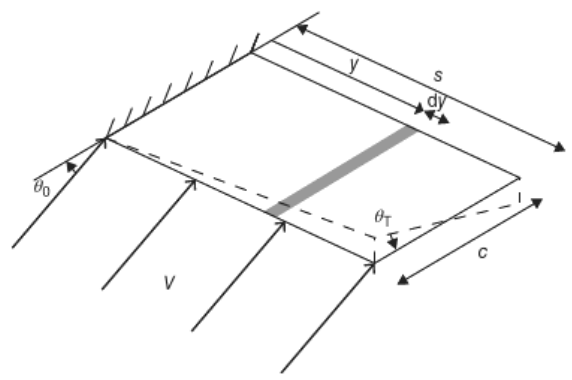

In [1]:
from IPython.display import Image  # class to display images
import os  # module with miscellaneous operating system interfaces

Image(filename=os.path.join('resources', '02_Wing.PNG'))  # display image

Similarly to the [case of the airfoil](01_Divergence_of_a_2D_Rigid_Airfoil_with_Torsional_Spring_Attachment.ipynb) we want to find the elastic twist as a function of the dynamic pressure and see if we can identify divergence. Since our wing is a continuous system we are going to use the Rayleight-Ritz method, also known as the "assumed shape" approach. This method consists in representing the deformation of a continuous system by a finite series of known assumed deformation shapes, each multiplied by an unkown coefficient, essentially corresponding to a generalized coordinate. Then we can plug the assumed expression of the deformation into the terms of the Lagrange's equation and obtain in this way the equations of motion. Let's see what this means for our problem!

In our case we want to represent the elastic twist of the wing along the spanwise direction $\theta(y)$ by a series of assumed deformation shapes:

$$\theta(y)=\sum_{j=1}^N\psi_j(y)q_j,$$

where $\psi_j(y)$ is the $j$th assumed deformation shape, $q_j$ is the $j$th generalized coordinate and $N$ is the number of terms in the series. Note that in general $\theta$ may also be a function of time $t$. In that case the time dependency is taken by the generalized coordinates, so we would have $\theta(y,t)=\sum_{j=1}^N\psi_j(y)q_j(t)$. However, since we are considering a static problem we do not have any time dependence.

We decide to use only one shape to model $\theta(y)$ and we assume a linear shape:

$$\theta(y)=\frac{y}{s}\theta_T,$$

where our generalized coordinate corresponds to the wing tip twist $\theta_T$. Note that if we were after the estimation of the first natural frequency, using only a single assumed shape would not yield accurate results. In fact, with the Rayleigh-Ritz method the more shapes we use, the more accurate approximation we will obtain. However, for our purpose of demonstrating the divergence behavior, our choice is not going make any harm.

Analogously to the [case of the airfoil](01_Divergence_of_a_2D_Rigid_Airfoil_with_Torsional_Spring_Attachment.ipynb), now we need to determine the non-null terms of Lagrange's equation and calculate them. Since we are dealing with a static problem without energy dissipation, we can neglect the kinetic energy and the dissipative function terms. The Lagrange's equation for our problem then reduces to:

$$\frac{\partial U}{\partial\theta_T} = Q = \frac{\partial\left(\delta W\right)}{\partial\left(\delta\theta_T\right)}.$$

The elastic potential energy $U$ corresponds to the strain energy due to twist:

$$U = \frac{1}{2}\int_0^sGJ\left(\frac{\mathrm{d}\theta}{\mathrm{d}y}\right)^2\mathrm{d}y = \frac{GJ}{2}\int_0^s\left(\frac{\theta_T}{s}\right)^2\mathrm{d}y = \frac{GJ}{2}\left(\frac{\theta_T}{s}\right)^2s = \frac{GJ}{2s}\theta_T^2.$$

Consequently, the term on the left-hand side of Lagrange's equation is given by:

$$\frac{\partial U}{\partial\theta_T}=\frac{GJ}{s}\theta_T.$$

Now let's consider the right-hand side of the equation. What is the incremental work $\delta W$ done by the aerodynamic forces on the wing? It corresponds to the pitching moment induced by the lift force multiplied by the incremental twist angle produced along the wing. To calculate the incremental work over the entire wing we'll use the strip theory to calculate the incremental work produced on an elemental strip $\mathrm{d}y$ of the wing and we'll integrate the result across the entire semi-span. For an elemental strip $\mathrm{d}y$, the incremental work $\mathrm{d}\left(\delta W\right)$ is given by the local pitching moment $\mathrm{d}M$ multiplied by the incremental twist angle $\delta\theta$:

$$\mathrm{d}\left(\delta W\right)=\mathrm{d}M\delta\theta.$$

The elemental pitching moment is given by the elemental lift $\mathrm{d}L$ multiplied by the moment arm with respect to the elastic axis $ec$:

$$\mathrm{d}M=\mathrm{d}Lec=qca_W\left(\theta_0+\frac{y}{s}\theta_T\right)\mathrm{d}y\,ec = qec^2a_W\left(\theta_0+\frac{y}{s}\theta_T\right)\mathrm{d}y,$$

where $q$ is the dynamic pressure and $a_W$ is the lift curve slope of the wing.

The incremental twist angle $\delta\theta$ can be expressed in terms of the incremental generalized coordinate $\delta\theta_T$:

$$\delta\theta=\frac{y}{s}\delta\theta_T.$$

As a consequence the total incremental work is given by:

$$\delta W=\int_0^sqec^2a_W\left(\theta_0+\frac{y}{s}\theta_T\right)\frac{y}{s}\delta\theta_T\mathrm{d}y=\frac{qec^2a_W}{s}\delta\theta_T\int_0^s\left(y\theta_0+\frac{y^2}{s}\theta_T\right)\mathrm{d}y = qec^2a_W\left(\frac{s\theta_0}{2}+\frac{s\theta_T}{3}\right)\delta\theta_T.$$

We can then calculate the generalized force $Q$:

$$Q = \frac{\partial\left(\delta W\right)}{\partial\left(\delta\theta_T\right)} = qec^2a_W\left(\frac{s\theta_0}{2}+\frac{s\theta_T}{3}\right).$$

And finally we can equate the term on the left-hand side to the one on the right-hand side:

$$\frac{GJ}{s}\theta_T=qec^2a_W\left(\frac{s\theta_0}{2}+\frac{s\theta_T}{3}\right),$$

that results in the following:

$$\theta_T=\frac{3qec^2s^2a_w}{6GJ-2qec^2s^2a_w}\theta_0.$$

Success! We've obtained an expression that links the elastic twist, through the generalized coordiante $\theta_T$, to the dynamic pressure $q$. Can we identify the divergence condition? Yes! When the denominator equals zero the tip twist goes to infinity, so we have divergence. Equating the denominator to zero we obtain the following expression for the dynamic pressure at divergence $q_W$:

$$q_W=\frac{3GJ}{ec^2s^2a_W}.$$

Let's apply our findings to a finite wing with torsional rigidity $GJ=2\cdot10^6$ Nm$^2$, chord $c=2$ m, semi-span $s=7.5$ m and having the elastic axis located at $48\%$ of the chord. We calculate the lift slope of the finite wing according to Prandtl's classical lifting-line theory:

$$\frac{\mathrm{d}C_L}{\mathrm{d}\alpha}=a_W=\frac{a_1}{1+\frac{a_1}{\pi AR}},$$

where $AR$ is the aspect ratio of the wing, $2s/c$ in our case, and $a_1$ is the lift slope of the 2D airfoil of the wing. In the hypothesis of a thin airfoil, $a_1=2\pi$ and the equation above can be rewritten as:

$$a_W=\frac{2\pi}{1+2/AR}.$$

In [2]:
import numpy as np  # import array library

GJ = 2e6  # torsional rigidity [Nm^2]
x_ea = .48  # nondimensional distance between leading edge and elastic axis
x_ac = .25  # nondimensional distance between leading edge and aerodynamic center
e = x_ea - x_ac  # nondimensional distance between elastic axis and aerodynamic center
c = 2  # chord [m]
s = 7.5  # semi-span [m]
AR = 2*s/c  # aspect ratio
a_w = 2*np.pi/(1+2/AR)  # lift slope of finite wing [1/rad]

With this data we can now calculate the divergence speed of our wing.

In [3]:
q_w = 3*GJ/(e*c**2*s**2*a_w)  # divergence dynamic pressure of finite wing
rho = 1.225  # density of air [kg/m^3]
v_w = np.sqrt(2*q_w/rho)  # divergence speed of finite wing
print(f'Divergence dynamic pressure of finite wing: {q_w:.0f} Pa\nCorresponding divergence speed: {v_w:.0f} m/s')

Divergence dynamic pressure of finite wing: 23373 Pa
Corresponding divergence speed: 195 m/s


Similarly to what we did in our previous notebook, let's calculate how the nondimensional twist $\theta_T/\theta_0$ changes with the dynamic pressure.

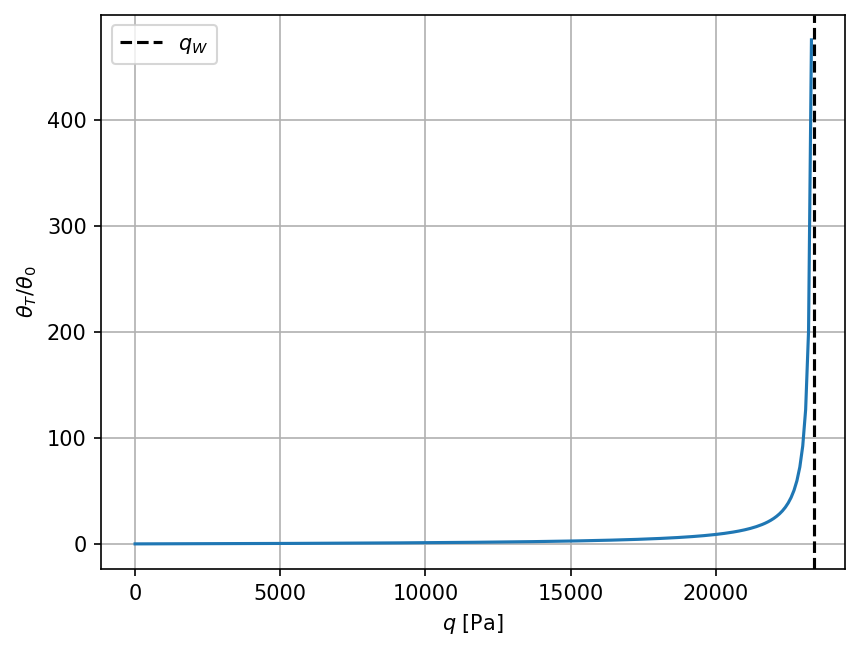

In [4]:
import matplotlib.pyplot as plt  # import plotting library

q = np.arange(0, q_w, 100)  # define range of dynamic pressure from 0 to q_w in steps of 100 Pa
nondimensional_twist = 3*q*e*c**2*s**2*a_w/(6*GJ-2*q*e*c**2*s**2*a_w)  # calculate theta_T/theta_0
plt.rcParams['figure.dpi'] = 150  # set default dpi of figures
fig, ax = plt.subplots()  # create a figure with one plot
ax.plot(q, nondimensional_twist)  # plot nondimensional twist vs dynamic pressure
ax.axvline(x=q_w, color='k', ls='--', label='$q_W$')  # plot q=q_w line
ax.legend()  # place legend in the plot
plt.xlabel('$q$ [Pa]')  # set the label for the x-axis
plt.ylabel('$\\theta_T/\\theta_0$')  # set the label for the y-axis
plt.grid()  # configure the grid lines
plt.show()  # display all open figures

We observe that the tip twist increases with the dynamic pressure in a similar manner to what we saw for a [rigid 2D airfoil](01_Divergence_of_a_2D_Rigid_Airfoil_with_Torsional_Spring_Attachment.ipynb). Also in this case it means that in reality structural failure will occur at the divergence speed.

How can we increase the divergence speed? Analogously to the [results of the airfoil](01_Divergence_of_a_2D_Rigid_Airfoil_with_Torsional_Spring_Attachment.ipynb), we see several parameters in the equation of the divergence dynamic pressure, but we can only really act on $GJ$ and $e$. In fact, chord, span and lift slope are once again dictated by the aerodynamic design and they cannot be easily changed without turning upside-down the overall aerodynamic performance. Instead, we can play with the structural design to adjust $GJ$ and $e$.

Let's look at what happens to the divergence speed when we change $GJ$, say going from half to double our initial value.

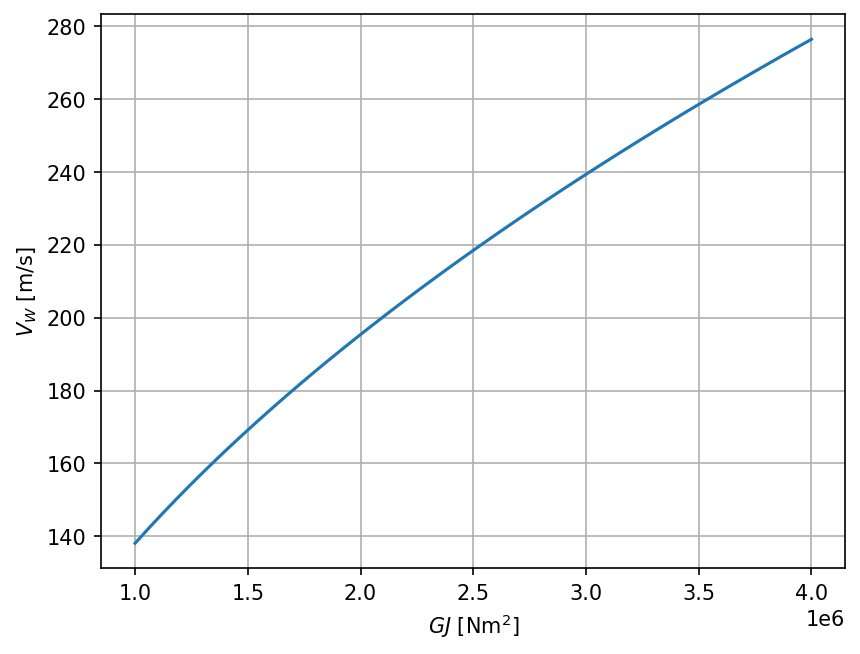

In [5]:
GJ_range = np.linspace(GJ/2, GJ*2)  # define range of GJ between half and double of the initial value
q_w_range = 3*GJ_range/(e*c**2*s**2*a_w)  # calculate the corresponding divergence dynamic pressures
v_w_range = np.sqrt(2*q_w_range/rho)  # calculate the associated values of divergence speed
plt.plot(GJ_range, v_w_range)  # plot divergence speed vs torsional rigidity
plt.xlabel('$GJ$ [Nm$^2$]')  # set the label for the x-axis
plt.ylabel('$V_{W}$ [m/s]')  # set the label for the y-axis
plt.grid()  # configure the grid lines
plt.show()  # display all open figures

The result should be of no surprise: also here we have a quadratic relation between $GJ$ and $V_W$. The same discussion on the trade-off between adequate torsional rigidity and wing weight made for the [airfoil case](01_Divergence_of_a_2D_Rigid_Airfoil_with_Torsional_Spring_Attachment.ipynb) applies here.

What about $e$? How does that affect the divergence speed? Now it's your turn to try. Define a range of positions of the elastic axis, $x_{ea}$, going from the leading edge to the trailing edge. Then calculate the corresponding values of $e$, $q_w$ and $v_W$. Plot the $V_W$ vs $x_{ea}$ curve. What happens when the elastic axis is positioned before the aerodynamic center, so for $x_{ea}\leq0.25$? Do you think this is an achievable configuration in a realistic design?